In [48]:
# import important libraries
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

In [49]:
# import warnings for ignore warnings
import warnings
warnings.filterwarnings("ignore")  

In [112]:
pd.set_option('display.max_columns', None)

In [50]:
# import dataset from external storage
df=pd.read_excel("https://raw.githubusercontent.com/vishalkrishna90/CUSTOMER-CONVERSION-PREDICTION/main/Customer%20Conversion%20Prediction.xlsx")

In [51]:
df.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58.0,management,married,tertiary,unknown,5.0,may,261.0,1.0,unknown,no
1,44.0,technician,single,secondary,unknown,5.0,may,151.0,1.0,unknown,no
2,33.0,entrepreneur,married,secondary,unknown,5.0,may,76.0,1.0,unknown,no
3,47.0,blue-collar,married,unknown,unknown,5.0,may,92.0,1.0,unknown,no
4,33.0,unknown,single,unknown,unknown,5.0,may,198.0,1.0,unknown,no


In [52]:
# check the shape of the data
df.shape   

(45211, 11)

# Data Cleaning 


HANDLING MISSING VALUES 

In [53]:
# find the null values
df.isnull().sum() 

age               0
job               0
marital           0
education_qual    0
call_type         0
day               0
mon               0
dur               0
num_calls         0
prev_outcome      0
y                 0
dtype: int64

We can see there are no null values, so we can move forward

In [54]:
# check duplicate values
df[df.duplicated()]

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
6893,34.0,services,married,secondary,unknown,28.0,may,124.0,1.0,unknown,no
8138,29.0,admin.,single,secondary,unknown,2.0,jun,121.0,4.0,unknown,no
11630,39.0,blue-collar,married,primary,unknown,19.0,jun,112.0,4.0,unknown,no
13400,36.0,blue-collar,married,secondary,cellular,9.0,jul,183.0,1.0,unknown,no
19826,36.0,management,married,tertiary,cellular,8.0,aug,75.0,2.0,unknown,no
19854,32.0,technician,single,tertiary,cellular,8.0,aug,31.0,2.0,unknown,no


In [55]:
# drop duplicate values
df.drop_duplicates(inplace=True, keep = 'first')

In [56]:
# check duplicate values after removing
df[df.duplicated()]

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y


CHECKING DATATYPE 

In [57]:
# check data type of our data
df.dtypes 

age               float64
job                object
marital            object
education_qual     object
call_type          object
day               float64
mon                object
dur               float64
num_calls         float64
prev_outcome       object
y                  object
dtype: object

# Change Data Type Of Some Columns

In [59]:
df['age'] = df['age'].astype(int)
df['day'] = df['day'].astype(int)
df['dur'] = df['dur'].astype(int)
df['num_calls'] = df['num_calls'].astype(int)


Now all the data type are correct

COLUMN NAMES CHANGING

In [60]:
# rename of some column for better understanding
df=df.rename(columns={"mon":"month","dur":"duration", 'y':'result'})

In [107]:
# df.to_csv('customer_conversion_data.csv',index = False)

NUMERICAL COLUMNS OUTLIER DETECTION 

In [61]:
# check outliers by describe
df.describe()

,age,day,duration,num_calls
count,45205.000000,45205.00000,45205.000000,45205.000000
mean,40.937087,15.80688,258.183055,2.763898
std,10.619130,8.32234,257.538504,3.098189
min,18.000000,1.00000,0.000000,1.000000
25%,33.000000,8.00000,103.000000,1.000000
50%,39.000000,16.00000,180.000000,2.000000
75%,48.000000,21.00000,319.000000,3.000000
max,95.000000,31.00000,4918.000000,63.000000


Check Outliers

In [62]:
#age column outlier removal
q1,q3=np.percentile(df["age"],[25,75])
IQR=q3-q1
upper=q3+1.5*IQR
lower=q1-1.5*IQR
print("upper age bound:",upper,"lower age bound :", lower)
age=[]
for i in df["age"]:
  if lower<=i<=upper:
    age.append(i)
print(len(age))
print(df.shape)

upper age bound: 70.5 lower age bound : 10.5
44718
(45205, 11)


In [63]:
# Numerical column cleaning
#duration column outlier removal
q1,q3=np.percentile(df["duration"],[25,75])
IQR=q3-q1
upper=q3+1.5*IQR
lower=q1-1.5*IQR
print("upper call duration:",upper,"lower call duration:", lower)
dur=[]
for i in df["duration"]:
  if lower<=i<=upper:
    dur.append(i)
print(len(dur))

upper call duration: 643.0 lower call duration: -221.0
41970


In [64]:
#num_calls outlier detection
q1,q3=np.percentile(df["num_calls"],[25,75])
IQR=q3-q1
upper=q3+1.5*IQR
lower=q1-1.5*IQR
print("upper num_calls:",upper,"lower num_calls", lower)
num_calls=[]
for i in df["num_calls"]:
  if lower<=i<=upper:
    num_calls.append(i)
print(len(num_calls))

upper num_calls: 6.0 lower num_calls -2.0
42141


In [65]:
df.result.value_counts()

no     39916
yes     5289
Name: result, dtype: int64

In [66]:
df[(df['age']>70.5) & (df['result'] == 'yes')].shape

(218, 11)

In [67]:
df[(df['duration']>643) & (df['result'] == 'yes')].shape

(1651, 11)

In [68]:
df[(df['num_calls']>6) & (df['result'] == 'yes')].shape

(161, 11)

Interpretation:-
    Extrem values are also very important, so we can't drop it

In [69]:
# remove all the outliers and assign into new variable
df_out_drop=df[(df["age"].isin(age)) & (df["duration"].isin(dur)) & (df["num_calls"].isin(num_calls))]

In [70]:
# check shape of new dataframe
df_out_drop.shape

(38661, 11)

# EXPLORATORY DATA ANALYSIS

<AxesSubplot:>

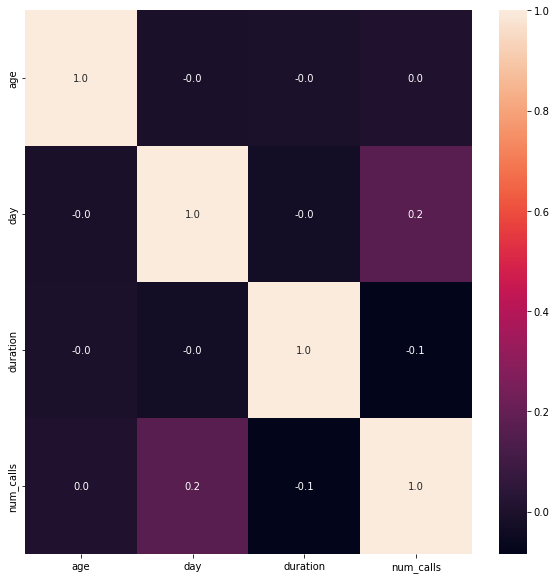

In [71]:
#lets check whether linear relationship exists between numeric fetures and target using pearson correlation coeff
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True, fmt='.1f')

**Check Feature Distribution**

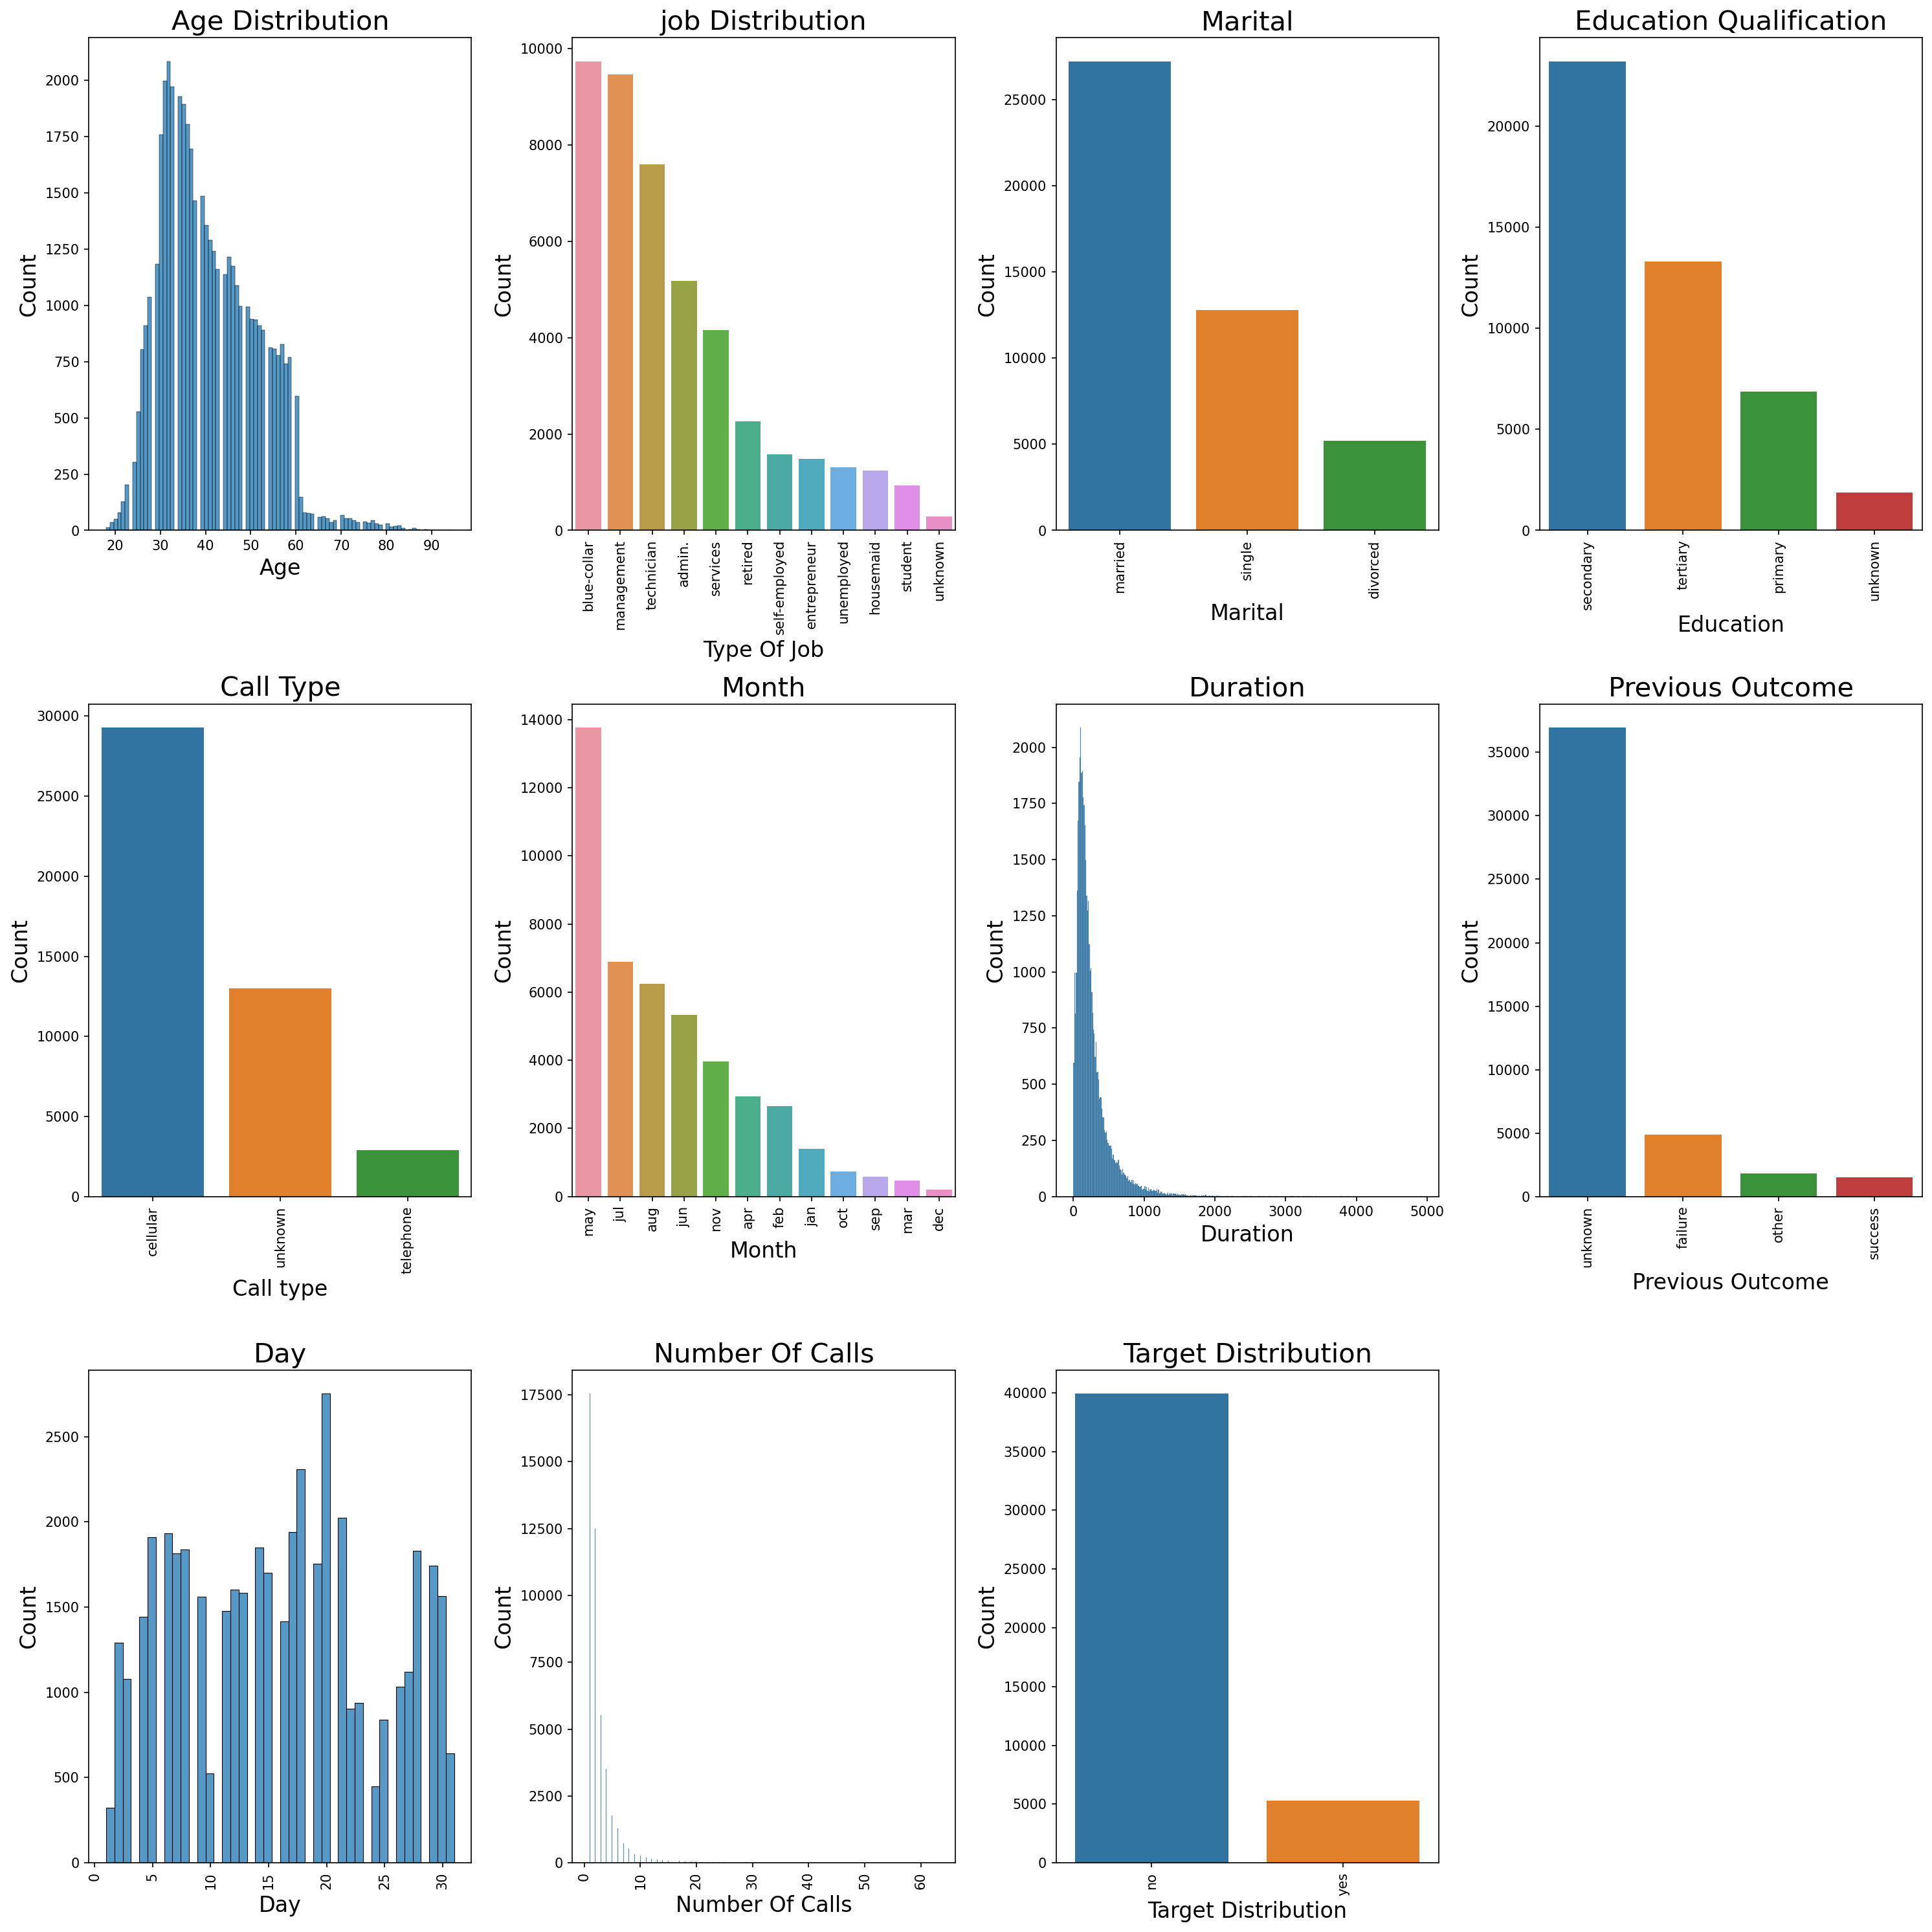

In [37]:
# Age distribution 
plt.figure(figsize = (20,20),dpi=150)  
plt.subplot(3,4,1) 
sns.histplot(df.age) 
plt.title('Age Distribution', fontsize = 20) 
plt.xlabel('Age',fontsize = 16) 
plt.ylabel('Count',fontsize = 16)  
#Job distribution 
plt.subplot(3,4,2) 
sns.countplot(df['job'],order=df.job.value_counts().index) 
plt.title('job Distribution', fontsize = 20) 
plt.xlabel('Type Of Job',fontsize = 16) 
plt.xticks(rotation = 90) 
plt.ylabel('Count',fontsize = 16)  
# Marital distribution 
plt.subplot(3,4,3) 
sns.countplot(df['marital'],order=df.marital.value_counts().index) 
plt.title('Marital', fontsize = 20) 
plt.xlabel('Marital',fontsize = 16) 
plt.xticks(rotation = 90) 
plt.ylabel('Count',fontsize = 16)  
# Education qualification distribution 
plt.subplot(3,4,4) 
sns.countplot(df['education_qual'],order=df.education_qual.value_counts().index) 
plt.title('Education Qualification', fontsize = 20) 
plt.xlabel('Education',fontsize = 16) 
plt.xticks(rotation = 90) 
plt.ylabel('Count',fontsize = 16) 
 # Call type distribution 
plt.subplot(3,4,5) 
sns.countplot(df['call_type'],order=df.call_type.value_counts().index) 
plt.title('Call Type', fontsize = 20) 
plt.xlabel('Call type',fontsize = 16) 
plt.xticks(rotation = 90) 
plt.ylabel('Count',fontsize = 16)  
 # Mon distribution 
plt.subplot(3,4,6) 
sns.countplot(df['month'],order=df.month.value_counts().index) 
plt.title('Month', fontsize = 20) 
plt.xlabel('Month',fontsize = 16) 
plt.xticks(rotation = 90) 
plt.ylabel('Count',fontsize = 16)  
 # Dur distribution 
plt.subplot(3,4,7) 
sns.histplot(df.duration) 
plt.title('Duration', fontsize = 20) 
plt.xlabel('Duration',fontsize = 16) 
plt.ylabel('Count',fontsize = 16)  
 # Previous outcome  distribution  
plt.subplot(3,4,8) 
sns.countplot(df['prev_outcome'],order=df.prev_outcome.value_counts().index) 
plt.title('Previous Outcome', fontsize = 20) 
plt.xlabel('Previous Outcome',fontsize = 16) 
plt.xticks(rotation = 90) 
plt.ylabel('Count',fontsize = 16)  
# Day distribution 
plt.subplot(3,4,9) 
sns.histplot(df['day']) 
plt.title('Day', fontsize = 20) 
plt.xlabel('Day',fontsize = 16) 
plt.xticks(rotation = 90,fontsize = 10) 
plt.ylabel('Count',fontsize = 16)  
# Num call distribution 
plt.subplot(3,4,10) 
sns.histplot(df['num_calls']) 
plt.title('Number Of Calls', fontsize = 20) 
plt.xlabel('Number Of Calls',fontsize = 16) 
plt.xticks(rotation = 90) 
plt.ylabel('Count',fontsize = 16)  

 # Target distribution 
plt.subplot(3,4,11) 
sns.countplot(df['result']) 
plt.title('Target Distribution', fontsize = 20) 
plt.xlabel('Target Distribution',fontsize = 16)
plt.xticks(rotation = 90) 
plt.ylabel('Count',fontsize = 16)  

plt.tight_layout()
plt.show()

INTERPRETATION:
1. AGE 
  * Company targets 30 to 40 ages people to sell their insurance plan
  * People aged less than 25 years and more than 60 years are less targeted by the company for insurance 

2. JOB
  * Blue collar and management people are targeted most by insurance company
  * Students are least targeted for insurance plan

3. MARITAL STATUS
  * Married people are targeted the most and divorced people are least targeted 

4. EDUCATIONAL QUALIFICATION
  * Secondary qualified people have been targeted thye most for insurance followed by tertiary and primary

5. CALL_TYPE
  * Cellur mode is most used for contacting the people for campaign

6. Month
  * May month is when maxmium calls are generated for new insurance customers,december is the least no of calls placed by the company

7. Duration 
  * maximum number of calls lasted less than 1000 seconds

8. Previous Outcome
  * More unknown as status than failure and success

9. Day
  * Most number of calls are between in the mid of month

10. Number of Calls
  * Most People are contacted only 1 or 2 times by the company

11. Target
  * No of people subscribed is very less compared to Unsubcribed people

**Features vs Features**

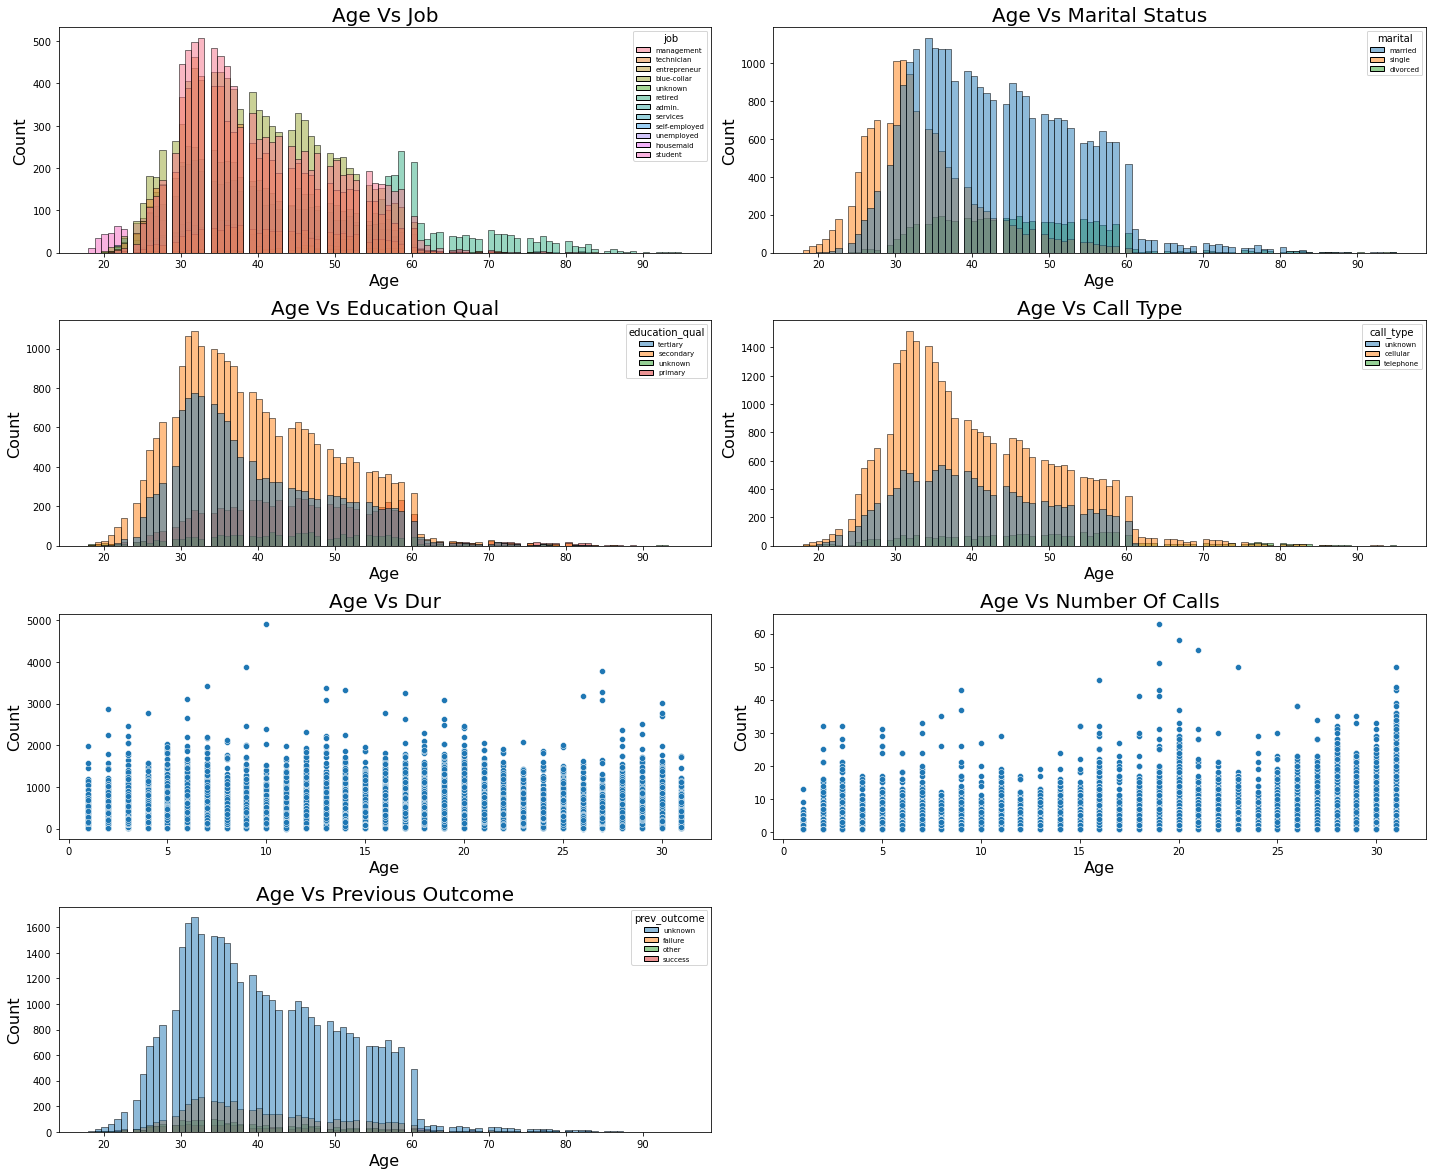

In [38]:
# Age vs job
plt.figure(figsize = (20,20))
plt.subplot(5,2,1)
ax = sns.histplot(x = 'age',hue = 'job',data = df)
sns.move_legend(ax,"upper right",fontsize = 7)
plt.title('Age Vs Job',fontsize = 20)
plt.xlabel('Age',fontsize = 16) 
plt.ylabel('Count',fontsize = 16)  

# Age vs marital
plt.subplot(5,2,2)
ax = sns.histplot(x = 'age',hue = 'marital',data = df)
sns.move_legend(ax,"upper right",fontsize = 7)
plt.title('Age Vs Marital Status',fontsize = 20)
plt.xlabel('Age',fontsize = 16) 
plt.ylabel('Count',fontsize = 16) 

# Age vs education qual
plt.subplot(5,2,3)
ax = sns.histplot(x = 'age',hue = 'education_qual',data = df)
sns.move_legend(ax,"upper right",fontsize = 7)
plt.title('Age Vs Education Qual',fontsize = 20)
plt.xlabel('Age',fontsize = 16) 
plt.ylabel('Count',fontsize = 16) 

# Age vs call type
plt.subplot(5,2,4)
ax = sns.histplot(x = 'age',hue = 'call_type',data = df)
sns.move_legend(ax,"upper right",fontsize = 7)
plt.title('Age Vs Call Type',fontsize = 20)
plt.xlabel('Age',fontsize = 16) 
plt.ylabel('Count',fontsize = 16) 

# Age vs day
plt.subplot(5,2,5)
sns.scatterplot(x ='day' ,y = 'duration',data = df)
plt.title('Age Vs Dur',fontsize = 20)
plt.xlabel('Age',fontsize = 16) 
plt.ylabel('Count',fontsize = 16) 

# Age vs num calls
plt.subplot(5,2,6)
sns.scatterplot(x ='day' ,y = 'num_calls',data = df)
plt.title('Age Vs Number Of Calls',fontsize = 20)
plt.xlabel('Age',fontsize = 16) 
plt.ylabel('Count',fontsize = 16) 

# Age vs previous outcome
plt.subplot(5,2,7)
ax = sns.histplot(x = 'age',hue = 'prev_outcome',data = df)
sns.move_legend(ax,"upper right",fontsize = 7)
plt.title('Age Vs Previous Outcome',fontsize = 20)
plt.xlabel('Age',fontsize = 16) 
plt.ylabel('Count',fontsize = 16)


plt.tight_layout()
plt.show()

**Plotting of Numerical data vs Target**

Here we are plotting all our Numerical columns with target to figure out, is there any relation between numerical features column. Here we plot 2 type of numerical data:

* Continous variable
* discrete variable


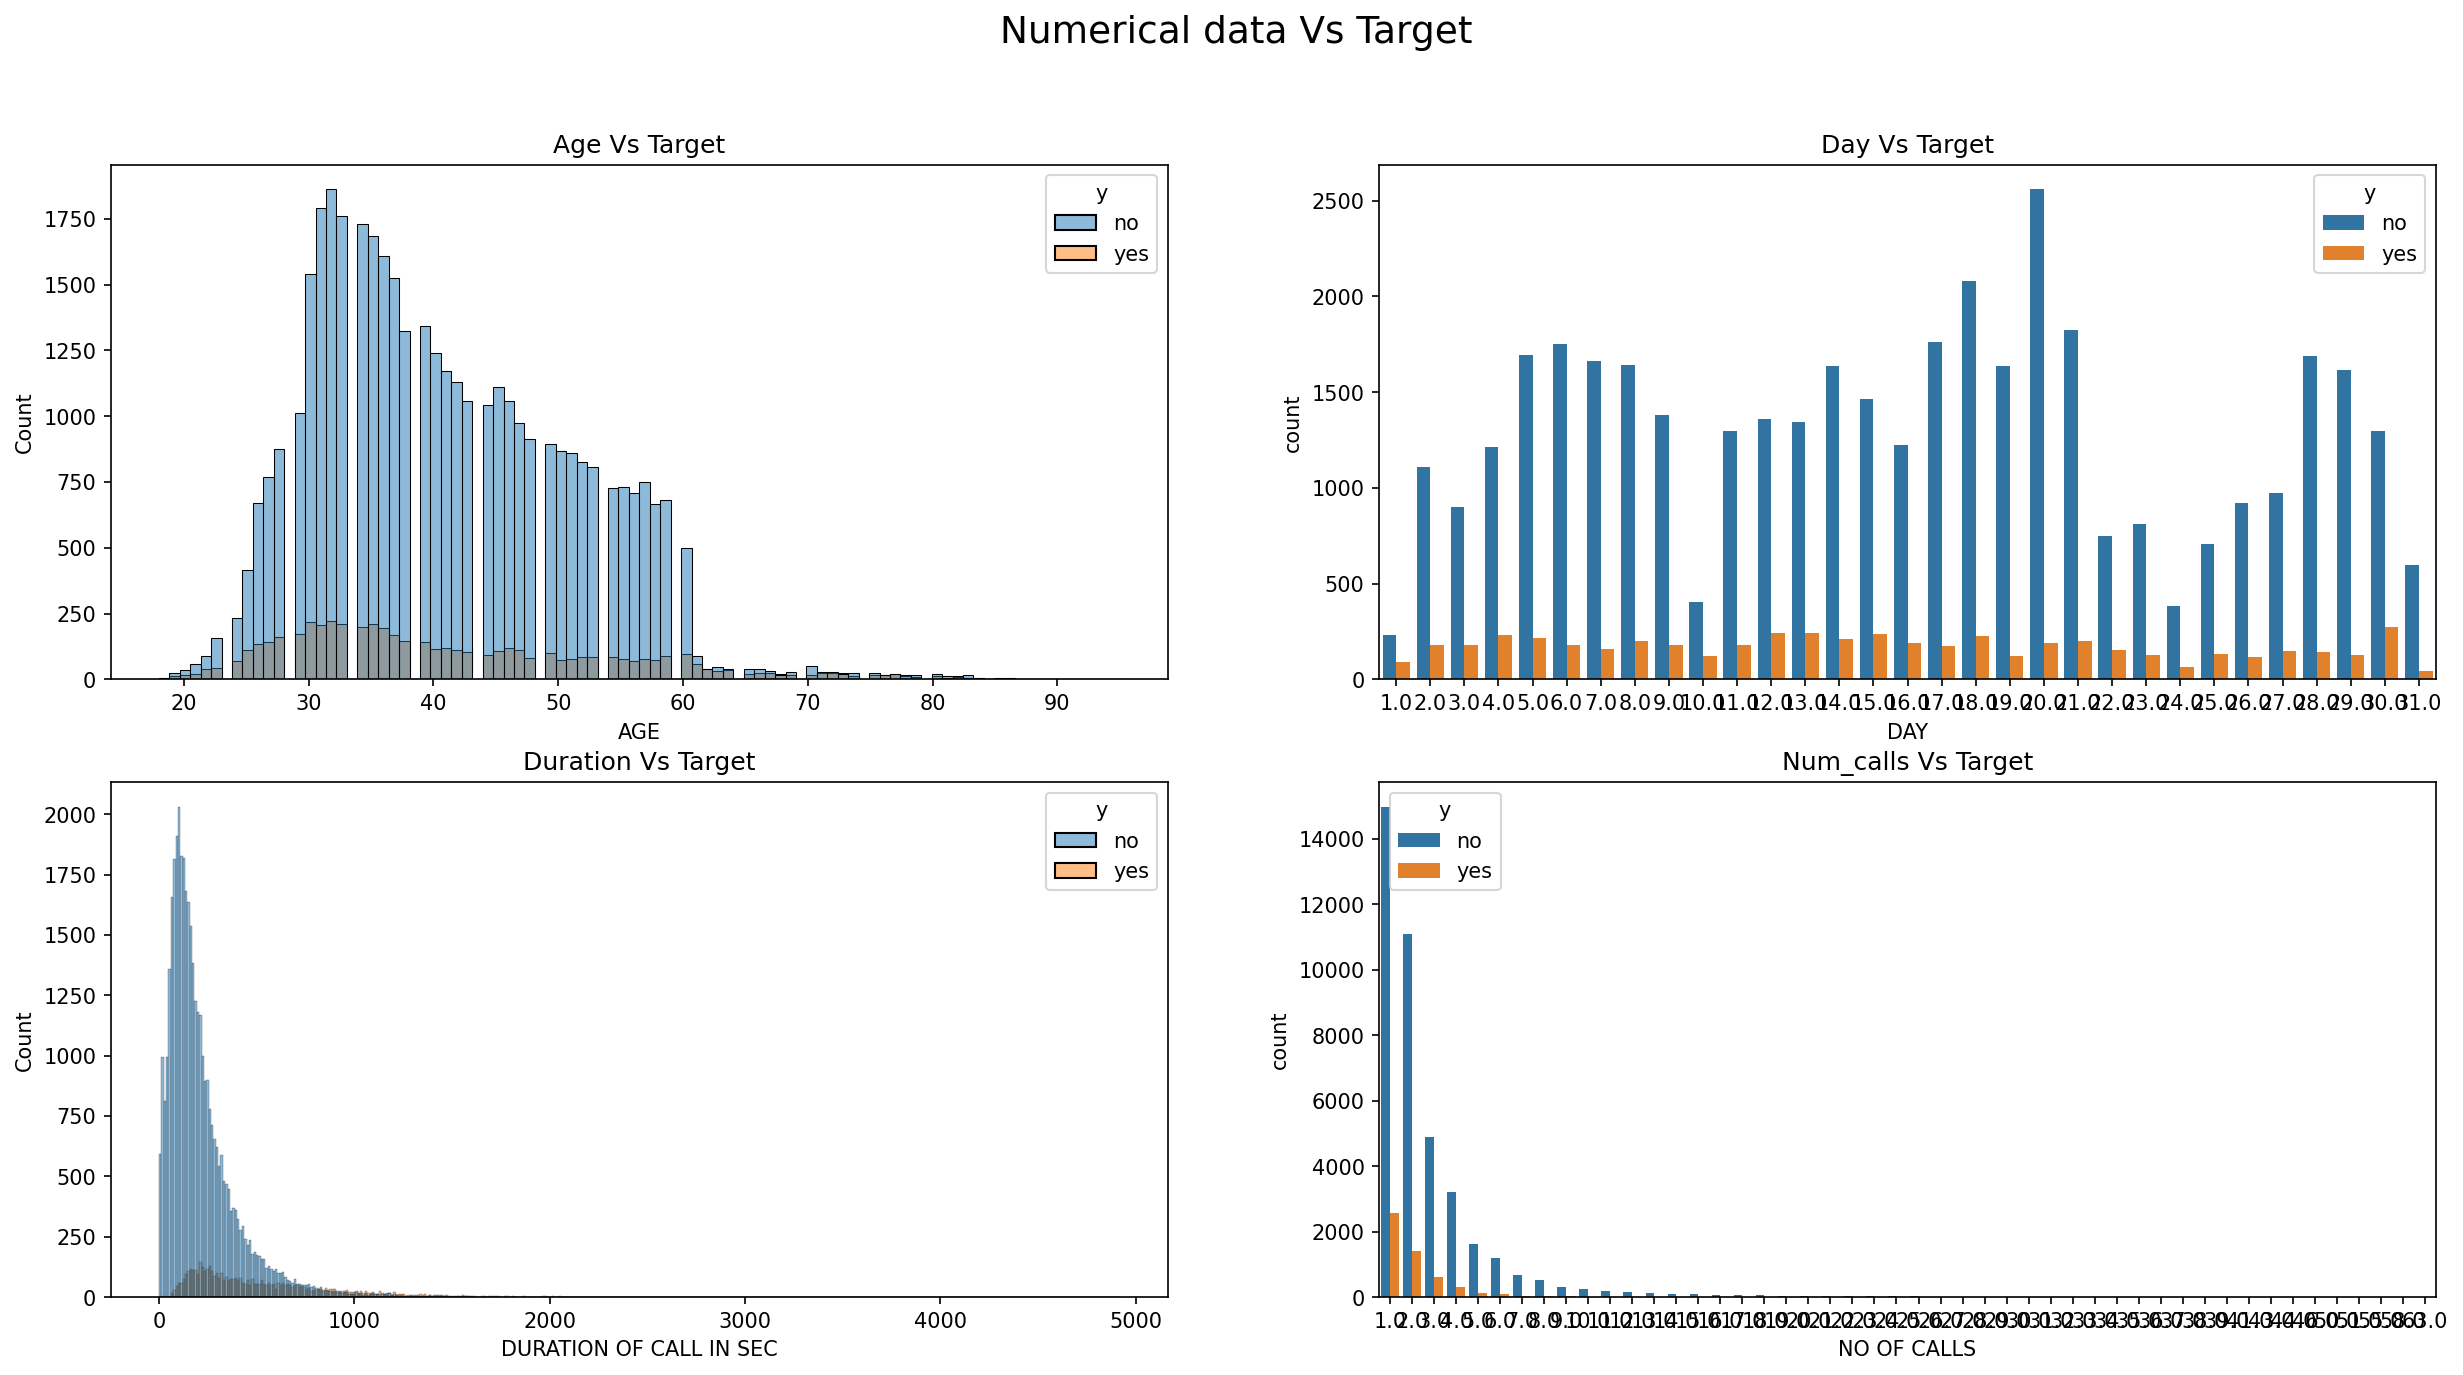

In [39]:
plt.figure(figsize=(20, 10), dpi=150)
plt.subplot(2,2,1)
sns.histplot(x='age',hue='result',data=df)
plt.title("Age Vs Target",)
plt.xlabel("AGE")

plt.subplot(2,2,2)
sns.countplot(x='day',hue='result',data=df)
plt.title("Day Vs Target")
plt.xlabel("DAY")

plt.subplot(2,2,3)
sns.histplot(x='duration',hue='result',data=df)
plt.title("Duration Vs Target")
plt.xlabel("DURATION OF CALL IN SEC")

plt.subplot(2,2,4)
sns.countplot(x='num_calls',hue='result',data=df)
plt.title("Num_calls Vs Target")
plt.xlabel("NO OF CALLS")

plt.suptitle("Numerical data Vs Target", fontsize=18)  #suptitle to show title for overall plot 
plt.show()

INTERPRETATION:

1. AGE VS TARGET

* 



**Categorical Columns**

Plotting of Categorical data vs Target



From the above plot 
* we can see Blue collar JOb type person have been contacted the most and 

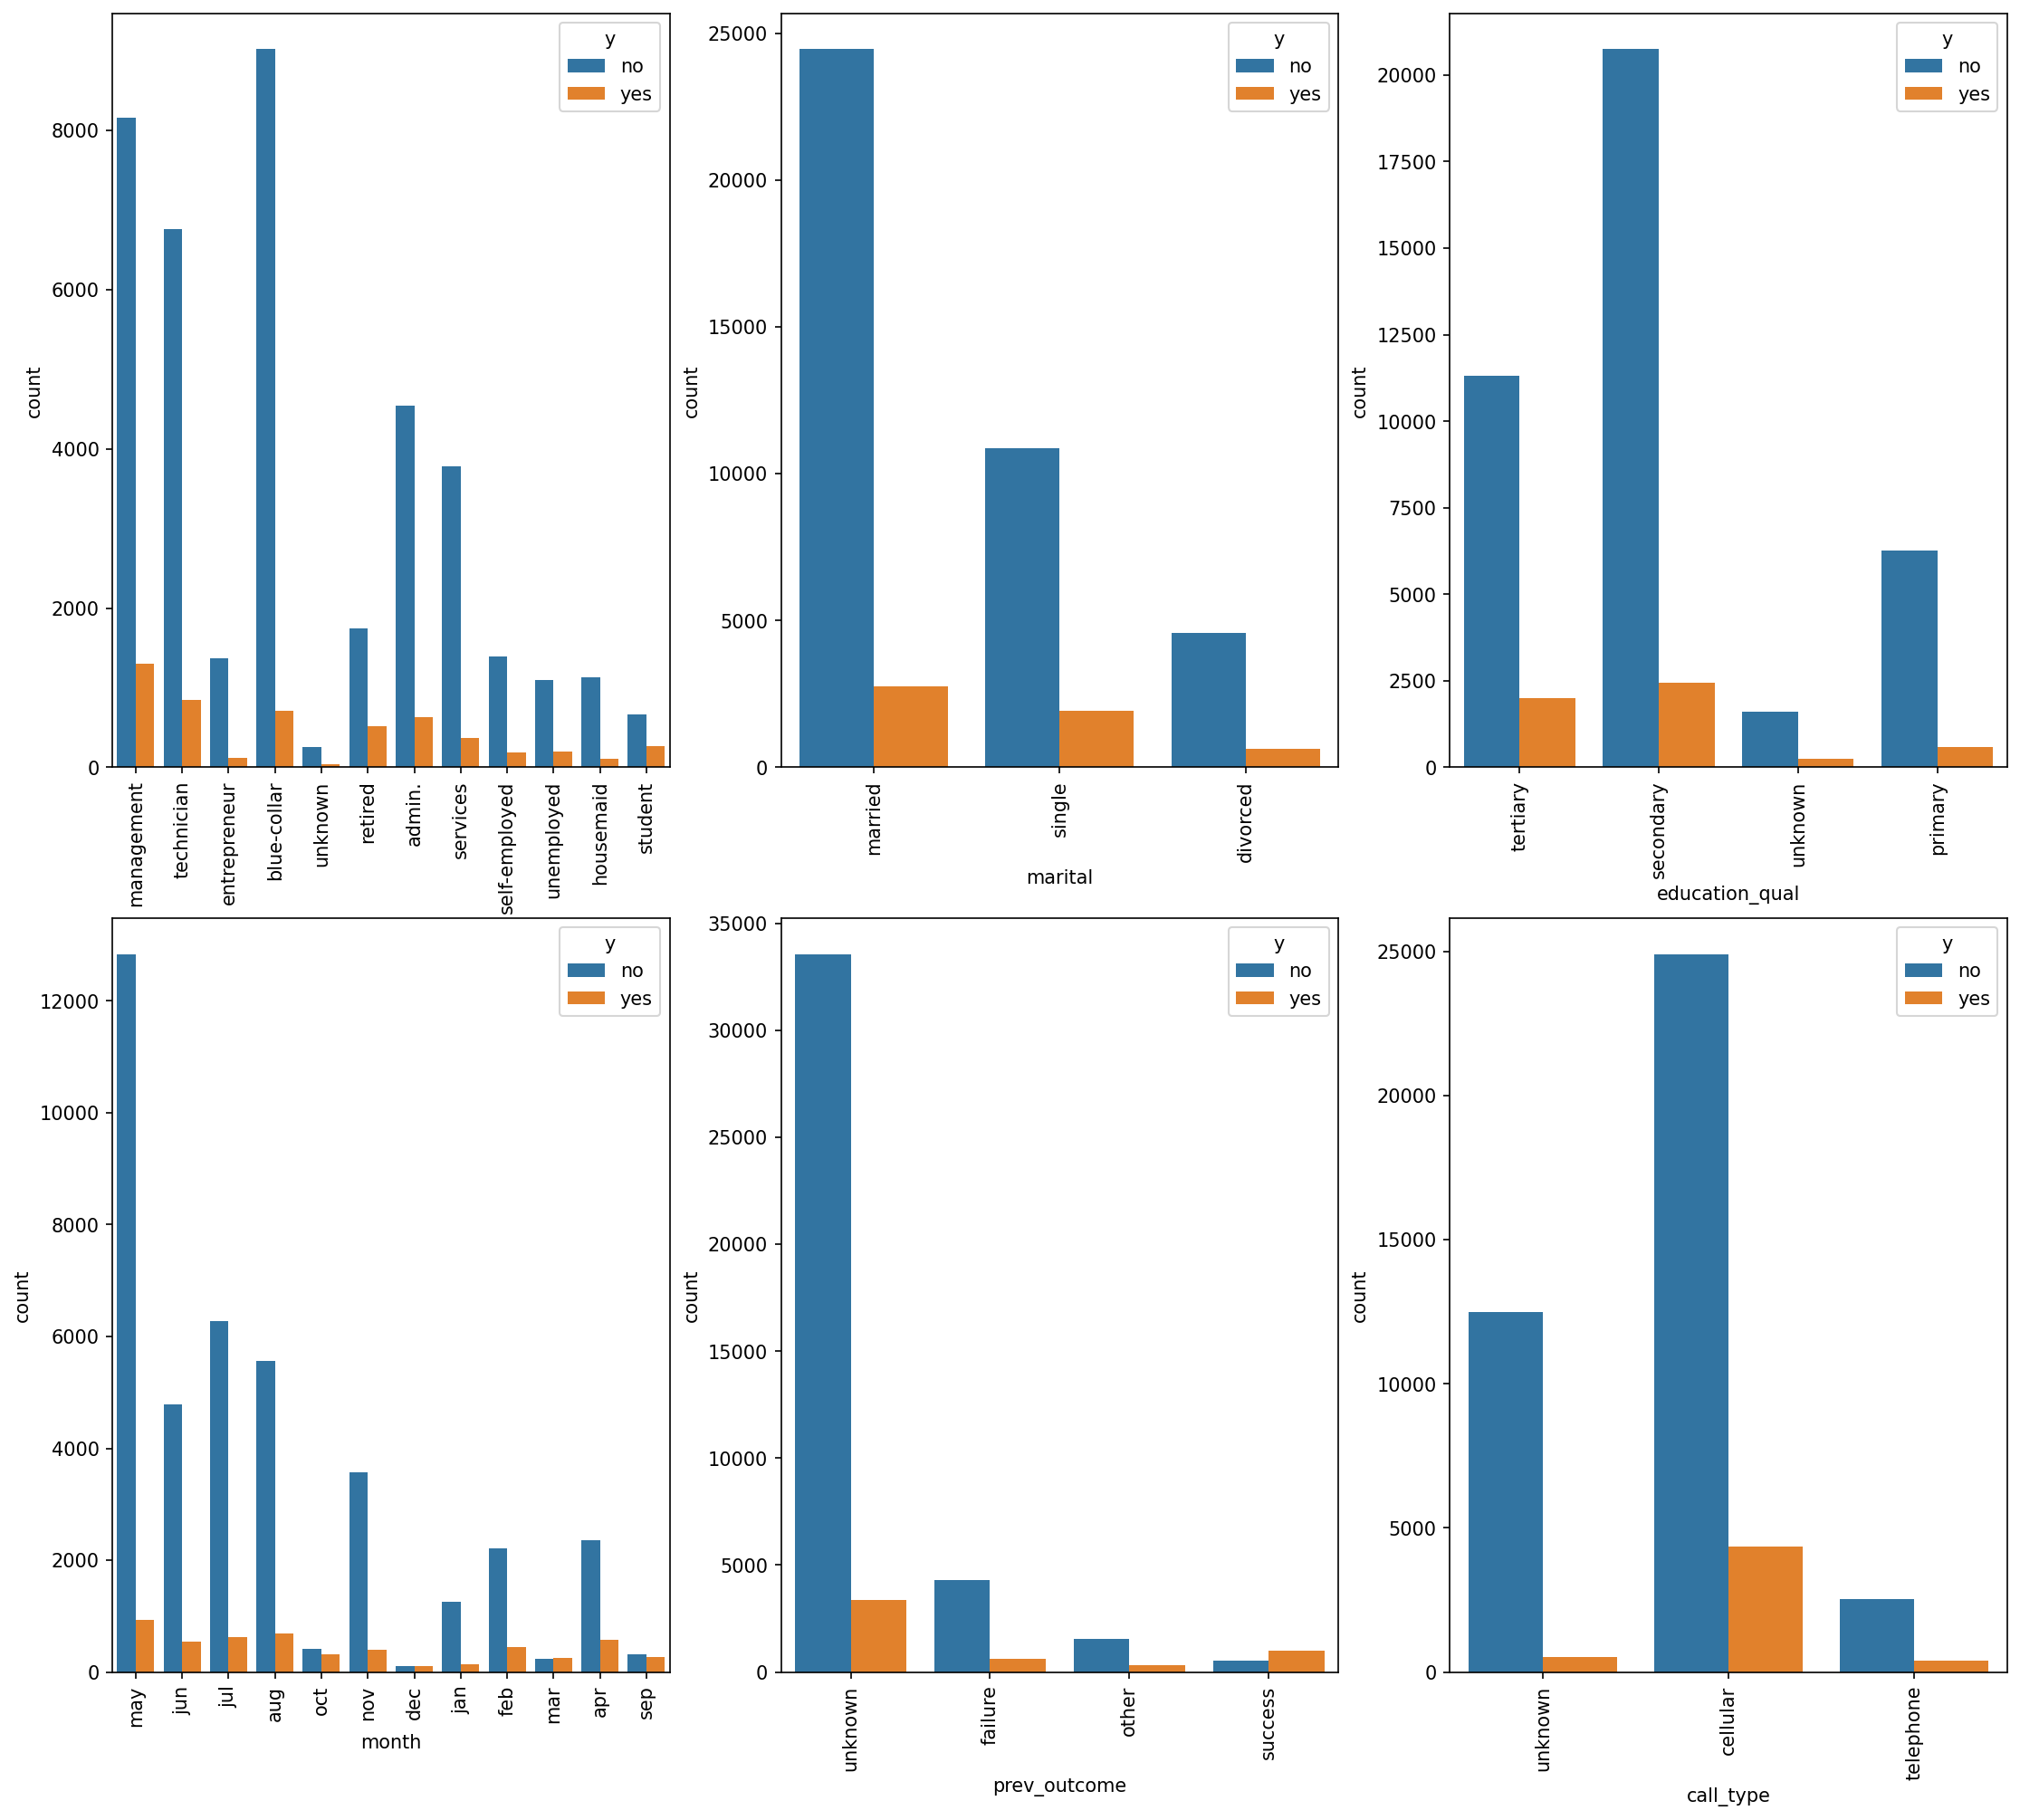

In [40]:

plt.figure(figsize=(18,25), dpi=150)

plt.subplot(3,3,1)
sns.countplot(x='job',hue='result',data=df)
plt.xticks(rotation=90)

plt.subplot(3,3,2)
sns.countplot(x='marital',hue='result',data=df)
plt.xticks(rotation=90)

plt.subplot(3,3,3)
sns.countplot(x='education_qual',hue='result',data=df)
plt.xticks(rotation=90)

plt.subplot(3,3,4)
sns.countplot(x='month',hue='result',data=df)
plt.xticks(rotation=90)

plt.subplot(3,3,5)
sns.countplot(x='prev_outcome',hue='result',data=df)
plt.xticks(rotation=90)

plt.subplot(3,3,6)
sns.countplot(x='call_type',hue='result',data=df)
plt.xticks(rotation=90)

plt.show()

Interpretation:
1. 

# Data Encoding

In [72]:
n_df = df.copy()

In [73]:
n_df = pd.get_dummies(n_df,columns=['job'],drop_first=True)

In [74]:
n_df['marital'] = n_df['marital'].map({'married':0,'single':1,'divorced':2})

In [75]:
n_df['education_qual'] = n_df['education_qual'].map({'secondary':0,'primary':2,'tertiary':1,'unknown':3})

In [76]:
n_df['call_type']= n_df['call_type'].map({'cellular':0,'unknown':1,'telephone':2})

In [77]:
n_df = pd.get_dummies(n_df,columns=['month'],drop_first=True)

In [78]:
n_df = pd.get_dummies(n_df,columns=['prev_outcome'],drop_first=True)

In [79]:
n_df['result'] = n_df['result'].map({'no':0,'yes':1})

In [113]:
n_df.head()

,age,marital,education_qual,call_type,day,duration,num_calls,result,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,prev_outcome_other,prev_outcome_success,prev_outcome_unknown
0,58,0,1,1,5,261,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
1,44,1,0,1,5,151,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
2,33,0,0,1,5,76,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
3,47,0,3,1,5,92,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
4,33,1,3,1,5,198,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1


In [81]:
X = n_df.drop('result',axis = 1)
y = n_df['result']

**Splitting The data**

In [82]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

# Balance The Data And Model Building With Outliers Data

In [83]:
from imblearn.combine import SMOTETomek
smt = SMOTETomek(sampling_strategy='all')
X_train, y_train = smt.fit_resample(X_train, y_train)

# Data Scaling

In [84]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [85]:
# make scaler pickle file
import pickle as pkl
pkl.dump(sc,open('ccp_scaler.pkl','wb'))

# Logistic Regression

In [86]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
lr = LogisticRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

In [89]:
log_score=accuracy_score(y_test,y_pred)
log_score = round(log_score,2)
log_score

0.86

# KNN Classifier

In [90]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
from sklearn.model_selection import GridSearchCV
params_grid = {'n_neighbors' : [1,2,3,4,5,6,7,8,9,10,20]}
greed_knn = GridSearchCV(knn,params_grid,cv = 10, n_jobs = 1)

In [91]:
greed_knn.fit(X_train,y_train)
y_pred = greed_knn.predict(X_test)
knn_score = accuracy_score(y_test,y_pred)
knn_score = round(knn_score,2)
knn_score

0.88

# Decision Tree

In [92]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
params_grid = {'max_depth': [1,2,3,4,5,6,7,8,9,10,20]}
greed_dtc = GridSearchCV(dtc,params_grid,cv = 10, n_jobs = 1)

In [93]:
greed_dtc.fit(X_train,y_train)
y_pred = greed_dtc.predict(X_test)
dtc_score = accuracy_score(y_test,y_pred)
dtc_score = round(dtc_score,2)
dtc_score

0.87

# Random Forest

In [94]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
params_grid = {'max_depth': [1,2,3,4,5,6,7,8,9,10,20]}
greed_rfc = GridSearchCV(rfc,params_grid, cv = 10, n_jobs = 1)

In [95]:
greed_rfc.fit(X_train,y_train)
y_pred = greed_rfc.predict(X_test)
rfc_score = accuracy_score(y_test,y_pred)
rfc_score = round(rfc_score,2)
rfc_score

0.89

# XG Boost

In [97]:
from xgboost import XGBClassifier
xgb = XGBClassifier(n_estimators=100,verbosity = 0)
params_grid = {'learning_rate' : [0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1,0.9,0.5,1]}
greed_xgbc = GridSearchCV(xgb,params_grid,cv = 10, n_jobs = 1)

In [98]:
greed_xgbc.fit(X_train,y_train)
y_pred = greed_xgbc.predict(X_test)
xgbc_score = accuracy_score(y_test,y_pred)
xgbc_score = round(xgbc_score,2)
xgbc_score

0.88

In [101]:
performance=pd.DataFrame({"Model":["Logistic regression","KNN","Decision Tree","Random Forest","XGboost"],
                       "accuracy score":[log_score,knn_score,dtc_score,rfc_score,xgbc_score]})

In [103]:
print("Models and their evaluations")
print("\n")
performance.sort_values(["accuracy score"],ascending=False)

Models and their evaluations




,Model,accuracy score
3,Random Forest,0.89
1,KNN,0.88
4,XGboost,0.88
2,Decision Tree,0.87
0,Logistic regression,0.86


**Random Forest Classifier  Performing Better Than Others For This Dataset, So It Will Be The Final Model**

# **Feature Importance By Random Forest Classifier**

In [104]:
imp_features = pd.DataFrame({'Importance' : greed_rfc.best_estimator_.feature_importances_},index = X.columns)
imp_features.Importance.sort_values(ascending=False) 

duration                0.279959
prev_outcome_unknown    0.086698
month_may               0.070741
call_type               0.063399
age                     0.052025
day                     0.049324
job_blue-collar         0.048194
month_jul               0.044283
month_aug               0.036128
month_nov               0.032953
num_calls               0.029509
job_technician          0.027230
month_jun               0.022255
job_services            0.020048
job_management          0.019067
education_qual          0.018162
month_feb               0.016400
month_jan               0.015249
marital                 0.014650
prev_outcome_other      0.010951
prev_outcome_success    0.007095
job_self-employed       0.006107
job_entrepreneur        0.005752
job_unemployed          0.004836
job_housemaid           0.004151
month_oct               0.003576
job_retired             0.003563
month_sep               0.002189
job_student             0.001957
month_mar               0.001844
month_dec 

In [106]:
pkl.dump(greed_rfc,open('ccp_rfc.pkl','wb'))